# **Equalization of a Histogram**
---
## **What is it?**
Is a technique used to enhance the contrast of an image by spreading out the most frequent intensity values.

## **Why is it useful?**
It makes an image easier to interpret visually when the image has poor contrast or its intesity values are concentrated in a narrow range (underexposed or ovexposed images).

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
aero3 = cv.imread(r"..\Images\aero3.jpg", 0)

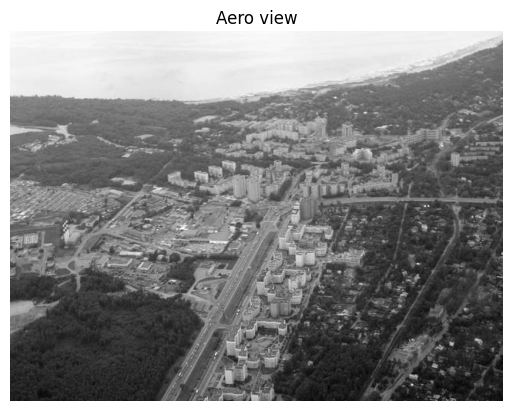

In [3]:
plt.imshow(aero3, "gray")
plt.title("Aero view")
plt.axis("off")
plt.show()

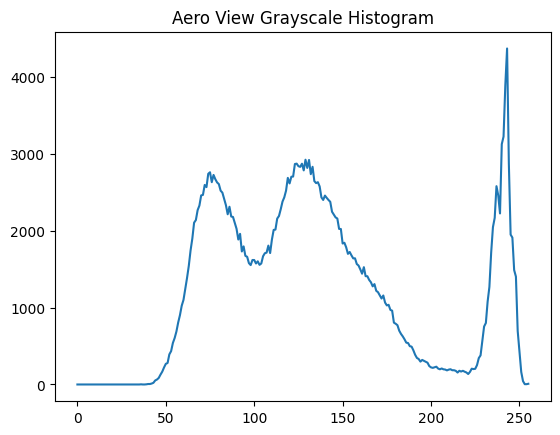

In [4]:
histogram = cv.calcHist([aero3], [0], None, [256], (0, 256))
plt.plot(histogram)
plt.title("Aero View Grayscale Histogram")
plt.show()

## **Equalization of the Histogram**

In [5]:
# Equalixing the histogram
aero3_eq = cv.equalizeHist(aero3)

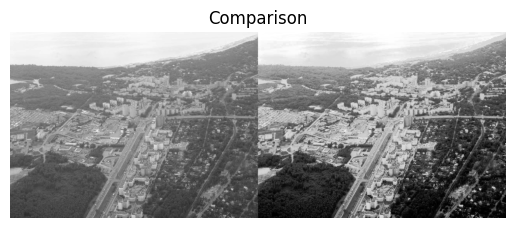

In [6]:
plt.imshow(np.hstack((aero3, aero3_eq)), "gray")
plt.title("Comparison")
plt.axis("off")
plt.show()

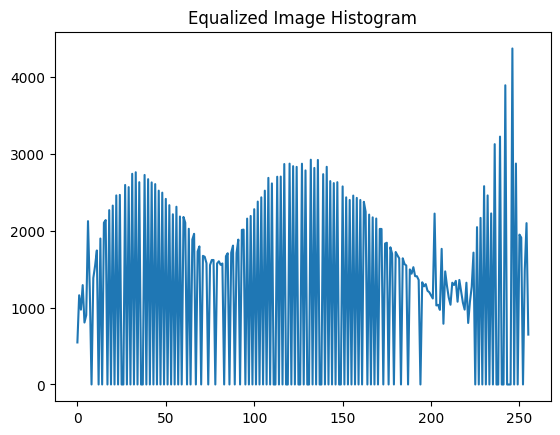

In [7]:
histogram_eq = cv.calcHist([aero3_eq], [0], None, [256], (0, 256))
plt.plot(histogram_eq)
plt.title("Equalized Image Histogram")
plt.show()

### **Another Example**

In [8]:
chicky = cv.imread(r"..\Images\chicky_512.png", 0)

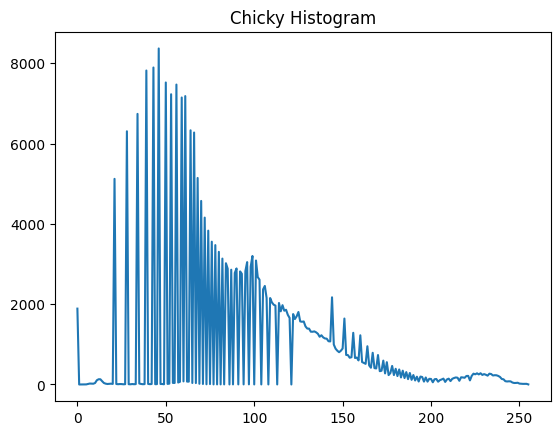

In [9]:
histogram_chicky = cv.calcHist([chicky], [0], None, [256], (0, 256))
plt.plot(histogram_chicky)
plt.title("Chicky Histogram")
plt.show()

In [10]:
chicky_eq = cv.equalizeHist(chicky)

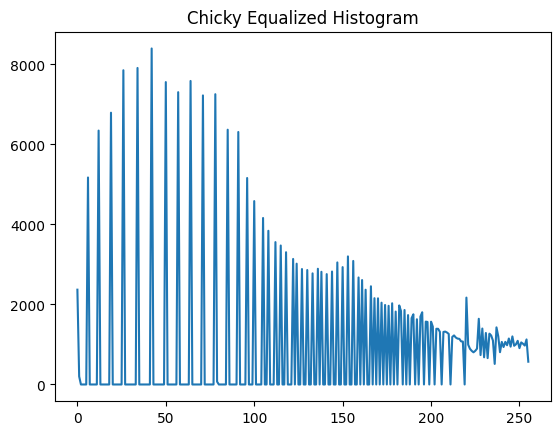

In [11]:
histogram_chicky_eq = cv.calcHist([chicky_eq], [0], None, [256], (0, 256))
plt.plot(histogram_chicky_eq)
plt.title("Chicky Equalized Histogram")
plt.show()

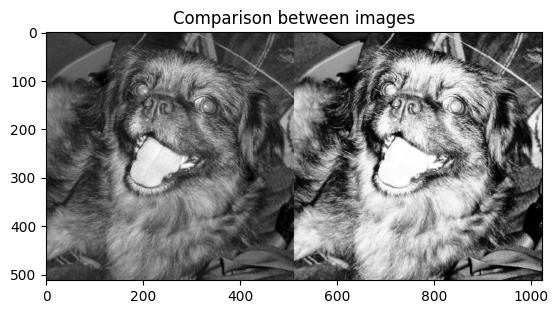

In [12]:
plt.imshow(np.hstack((chicky, chicky_eq)), "gray")
plt.title("Comparison between images")
plt.show()

# **Equalize Histogram of a Color Image**
---

## &#9888; <!-- Unicode for the warning symbol --> **What You Should Not Do**

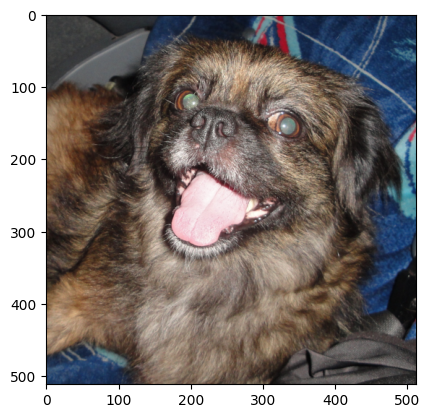

In [13]:
colored_chicky = cv.imread(r"..\Images\chicky_512.png")[:, :, ::-1]
plt.imshow(colored_chicky)
plt.show()

## **How to equalize RGB**
**Steps**
1. Split the channels
2. Equalize each channel
3. Merge the already equalized channels

In [14]:
# 1. Step
R_channel = colored_chicky[:, :, 0]
G_channel = colored_chicky[:, :, 1]
B_channel = colored_chicky[:, :, 2]

In [15]:
# 2.  Step
R_channel_eq = cv.equalizeHist(R_channel)
G_channel_eq = cv.equalizeHist(G_channel)
B_channel_eq = cv.equalizeHist(B_channel)

In [16]:
# 3. Step
colored_chicky_eq = cv.merge((R_channel_eq, G_channel_eq, B_channel_eq))

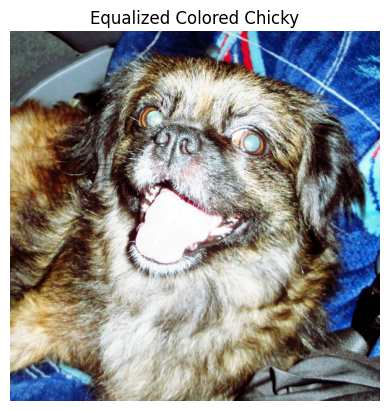

In [17]:
# 4. Step
plt.imshow(colored_chicky_eq)
plt.title("Equalized Colored Chicky")
plt.axis("off")
plt.show()

### **Faster Method to Equalize an Image**

In [21]:
whale = cv.imread(r"..\Images\rubberwhale1.png")[:, :, ::-1]

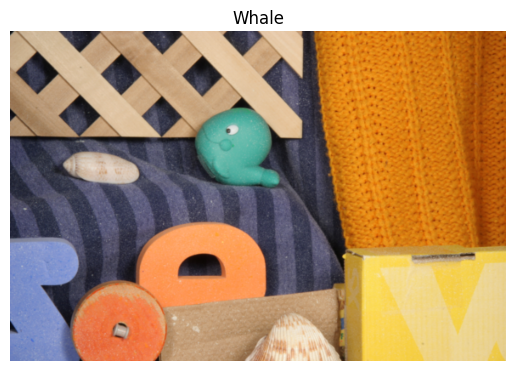

In [22]:
plt.imshow(whale)
plt.title("Whale")
plt.axis("off")
plt.show()

In [23]:
r, g, b = cv.split(whale)

In [24]:
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

In [25]:
whale_eq = cv.merge((r_eq, g_eq, b_eq))

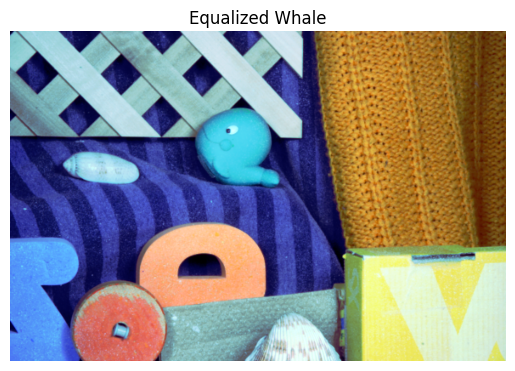

In [26]:
plt.imshow(whale_eq)
plt.title("Equalized Whale")
plt.axis("off")
plt.show()

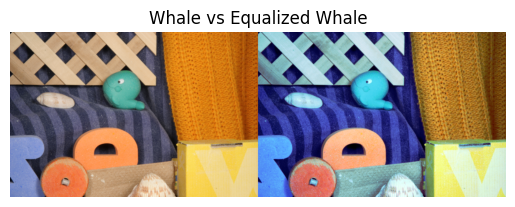

In [28]:
plt.imshow(np.hstack((whale, whale_eq)))
plt.title("Whale vs Equalized Whale")
plt.axis("off")
plt.show()

### **Problem with the image above**
The standard RGB color model represents color in a way that is not very aligned with human perception. In contrast we have **HSV (Hue, Saturation, Vlaue)**, also known as **HSB (Hue, Saturation, Brightness)** which aligns beter with the human perception.

For more information refer to [HSV Color Model](..\Color%20Spaces\hsv_space.ipynb)